<a href="https://colab.research.google.com/github/thao-phuong/bird_prediction/blob/main/bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import random
from os import listdir
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense


In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/drive')

Mounted at /drive


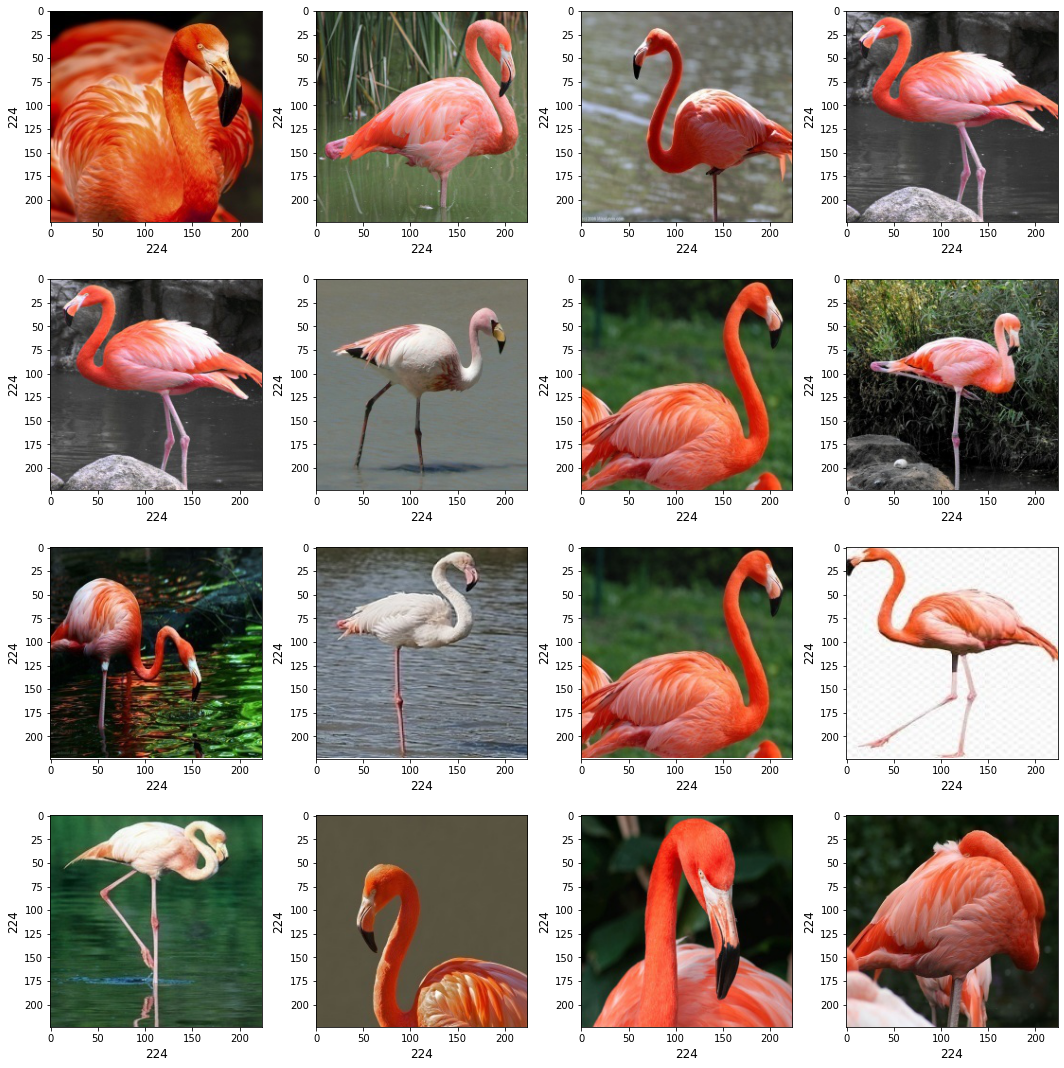

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,15))
path = "/drive/MyDrive/Colab Notebooks/Data/Bird Speciees Dataset/FLAMINGO"
for n in range(1,17):
    plt.subplot(4,4,n)
    plt.tight_layout()
    ran_image = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(ran_image)
    plt.xlabel(ran_image.shape[1], fontsize = 12)
    plt.ylabel(ran_image.shape[0], fontsize = 12)

In [ ]:
dir = "/drive/MyDrive/Colab Notebooks/Data/Bird Speciees Dataset"
root_dir = listdir(dir)
img_arr, lb_arr = [], []

In [ ]:
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    img_path = f"{dir}/{directory}/{files}"
    img = cv2.imread(img_path)
    img = img_to_array(img)
    img_arr.append(img)
    lb_arr.append(directory)

In [ ]:
lb_count = pd.DataFrame(lb_arr).value_counts()
lb_count

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [ ]:
num_class = len(lb_count)
num_class

6

In [ ]:
lb_arr = np.array(lb_arr)
lb_arr.shape

(811,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_arr, lb_arr, test_size=0.2, random_state = 0)

In [ ]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape( -1, 224,224,3)
X_test = X_test.reshape( -1, 224,224,3)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_class, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])


In [ ]:
epo = 40
bt_size = 128
his = model.fit(X_train, y_train, batch_size = bt_size, epochs = epo, validation_data = (X_val, y_val))

Epoch 1/40
5/5 [==============================] - 12s 2s/step - loss: 1.7809 - accuracy: 0.1757 - val_loss: 1.7616 - val_accuracy: 0.1462
Epoch 2/40
5/5 [==============================] - 11s 2s/step - loss: 1.7141 - accuracy: 0.2432 - val_loss: 1.6563 - val_accuracy: 0.2000
Epoch 3/40
5/5 [==============================] - 11s 2s/step - loss: 1.6031 - accuracy: 0.2664 - val_loss: 1.5385 - val_accuracy: 0.4692
Epoch 4/40
5/5 [==============================] - 11s 2s/step - loss: 1.4501 - accuracy: 0.5985 - val_loss: 1.4920 - val_accuracy: 0.4385
Epoch 5/40
5/5 [==============================] - 11s 2s/step - loss: 1.3763 - accuracy: 0.5579 - val_loss: 1.3101 - val_accuracy: 0.6231
Epoch 6/40
5/5 [==============================] - 11s 2s/step - loss: 1.1984 - accuracy: 0.6486 - val_loss: 1.2085 - val_accuracy: 0.6077
Epoch 7/40
5/5 [==============================] - 11s 2s/step - loss: 1.0453 - accuracy: 0.7085 - val_loss: 1.1532 - val_accuracy: 0.6000
Epoch 8/40
5/5 [==================

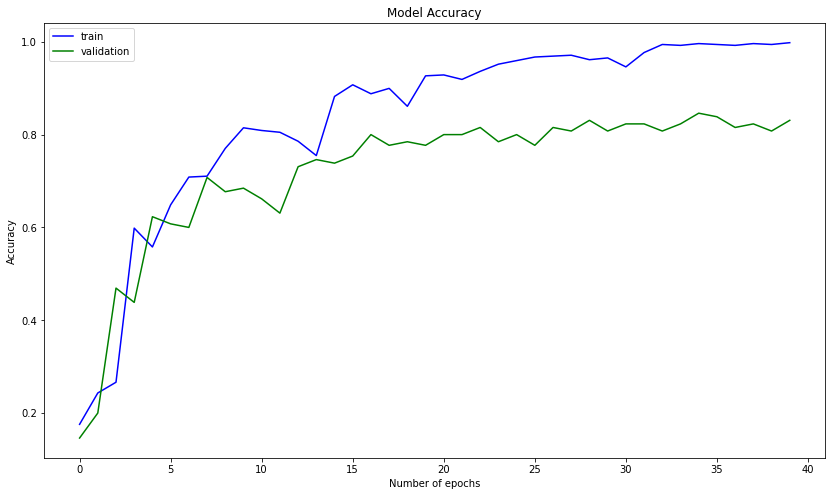

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(his.history['accuracy'], color='b')
plt.plot(his.history['val_accuracy'], color='g')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.title('Model Accuracy')
plt.show()

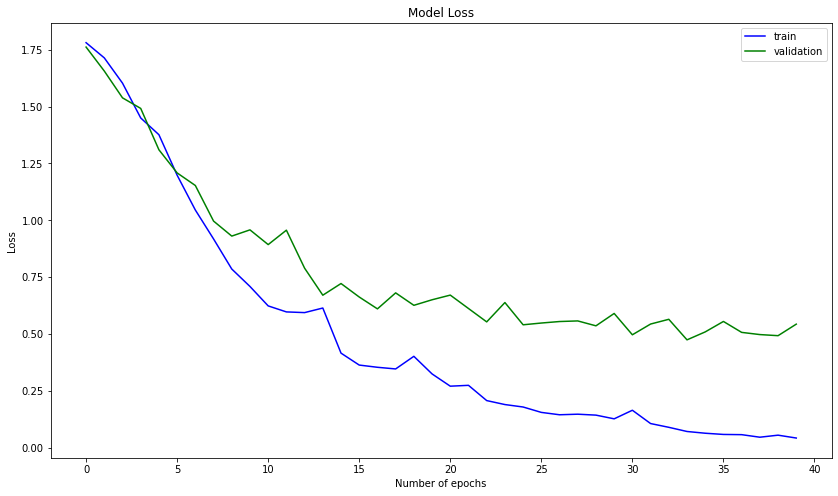

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(his.history['loss'], color='b')
plt.plot(his.history['val_loss'], color='g')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.title('Model Loss')
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {score[1]*100}")

6/6 [==============================] - 1s 222ms/step - loss: 0.4283 - accuracy: 0.8712
Test Accuracy: 87.11656332015991


In [ ]:
y_pred = model.predict(X_test)

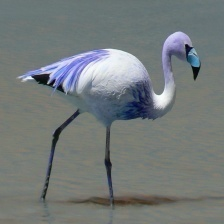

In [ ]:
image = array_to_img(X_test[4])
image

In [ ]:
lbs = lb.classes_
print(lbs)
print("Fact : ",lbs[np.argmax(y_test[4])])
print("Prediction : ",lbs[np.argmax(y_pred[4])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Fact :  FLAMINGO
Prediction :  FLAMINGO
